# Sign Language Action

## Deep Learning



Abstract:
*  Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion)

In [2]:
!pip install -q -U tensorflow>=1.8.0
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras


# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print(tf.__version__)
import warnings
warnings.filterwarnings('ignore')

C:\Users\spurt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.1


In [44]:
import os
print(os.listdir("../sign-language-mnist"))

['.ipynb_checkpoints', '1.8.0', '2-advanced-cnn.ipynb', 'american_sign_language.PNG', 'amer_sign2.png', 'amer_sign3.png', 'Assignment 3.ipynb', 'logs', 'new.ipynb', 'SignLanguage_MNIST.ipynb', 'sign_mnist_test.csv', 'sign_mnist_train.csv', 'tf.keras.ipynb', 'try.ipynb']


## Load Dataset
- MNIST Dataset
- Doc: https://keras.io/datasets/

In [45]:
data = pd.read_csv('../sign-language-mnist/sign_mnist_train.csv')
print('Dataframe Shape:', data.shape)

Dataframe Shape: (27455, 785)


In [93]:
train = pd.read_csv('../sign-language-mnist/sign_mnist_train.csv')
test = pd.read_csv('../sign-language-mnist/sign_mnist_test.csv')
train.shape

(27455, 785)

Displaying the initail rows of dataset

In [94]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [47]:
labels = train['label'].values

In [48]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [49]:
train.drop('label', axis = 1, inplace = True)

In [50]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

Splitting the data set into train and test dataset

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19218, 784)
(8237, 784)
(19218,)
(8237,)


In [54]:
x_train = x_train / 255
x_test = x_test / 255

In [55]:
x_train = x_train.reshape(x_train.shape[0],28,28, 1)
x_test = x_test.reshape(x_test.shape[0], 28,28, 1)

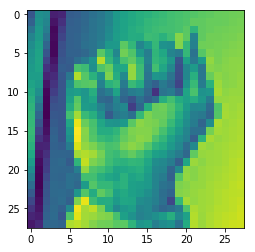

In [92]:
plt.imshow(x_train[0].reshape(28,28))

In [95]:
x = train.iloc[:, 1:].values
print("Number of images:", x.shape[0])
print("Number of pixels in each image:", x.shape[1])

Number of images: 27455
Number of pixels in each image: 784


In [96]:
y = train.iloc[:, :1].values.flatten()
print('Labels:\n', y)
print('Shape of Labels:', y.shape)

Labels:
 [ 3  6  2 ... 18 17 23]
Shape of Labels: (27455,)


In [97]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [98]:
def display_images(data):
    x, y = data
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i].reshape(28, 28), cmap = 'binary')
        ax.set_xlabel(chr(y[i] + 65))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

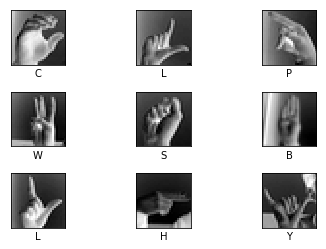

In [99]:
display_images(next_batch(9, x, y))

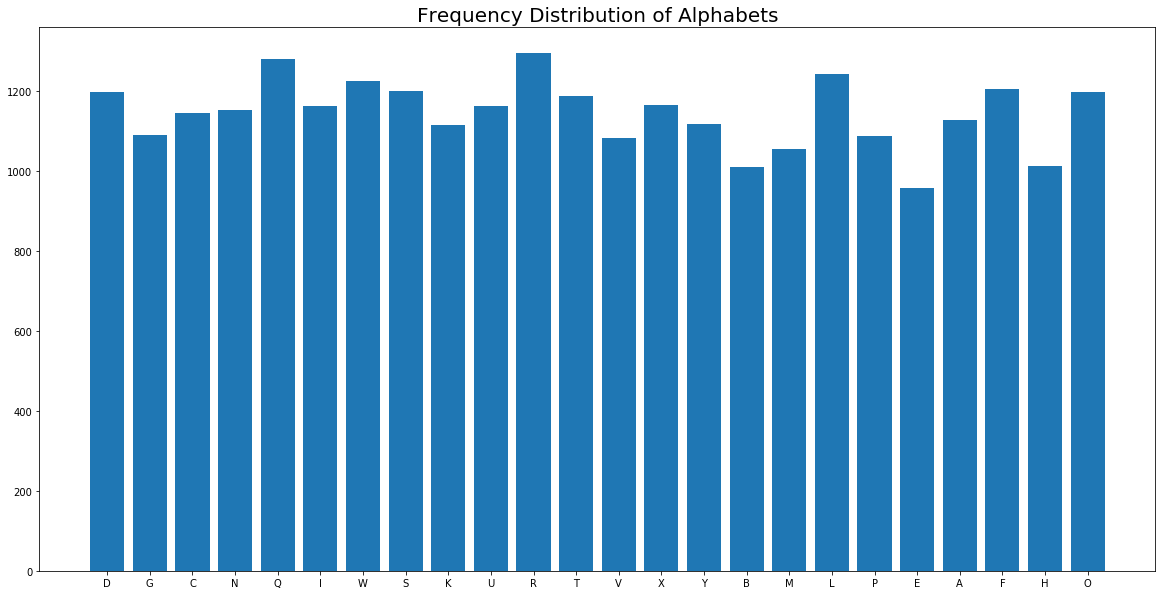

In [101]:
from collections import Counter
z = dict(Counter(list(y)))
labels = z.keys()
frequencies = [z[i] for i in labels]
labels = [chr(i + 65) for i in z.keys()]

plt.figure(figsize = (20, 10))
plt.bar(labels, frequencies)
plt.title('Frequency Distribution of Alphabets', fontsize = 20)
plt.show()

In [56]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [57]:
import tensorflow as tf
from tensorflow.keras import layers

##  Basic CNN model
- Basic CNN similar to what we made before
- One convolutional & pooling layer

In [58]:
batch_size = 128
samples_per_epoch = 1000
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 64
conv1_size = 3
conv2_size = 2
pool_size = 2
classes_num = 3
lr = 0.0004

In [59]:
def basic_cnn():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(tf.keras.layers.Flatten())
    # dense layer with 50 neurons
    model.add(tf.keras.layers.Dense(50, activation = 'relu',input_shape=(64,)))
    # final layer with 10 neurons to classify the instances
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    
    #adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'hinge', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [60]:
model = basic_cnn()

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9800)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                490050    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
_________________________________________________________________


In [59]:
%%time
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 10, verbose = 0)

Wall time: 13min 30s


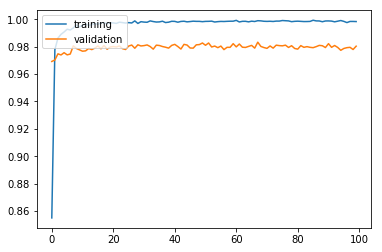

In [60]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [61]:
results = model.evaluate(X_test, y_test)

 9792/10000 [============================>.] - ETA: 0s

In [62]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9811


In this model activation function used are relu and softmax 
Rectified Linear Unit(ReLU) is the most widely used activation function as it solves the problem of vanishing gradients. 
Accuracy gers affected not only by the change in activation function but also other criteria such as epochs used to run at its highest level

Where two activation functions are implemented to classify a sign language image which are the relu and softmax activation function. The effect of utilizing different number of hidden layer for fixed iteration number on classification accuracy and the required computation time are analyzed. The results showed that the accuracy of the results of the relu activation function was not affected with the number of iterations compared to the selu activation function, whereas the relu activation function showed more stability than the selu activation function with the number of hidden layers changing.
The network pateau reached its highest point at when there were 100 epoch to run 

##  Deep CNN - 1
- Deeper network with 6 convolutional layers and 3 pooling layers
- Note that two (3x3) convolutional layers are stacked
    - It is equivalent to using one (5X5) convolutional layer, but with fewer parameters
    - Similar to the structured used in VGGnet

In [117]:

def deep_cnn():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(input_shape = (x_train.shape[1],x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',kernel_initializer='uniform'))
    model.add(tf.keras.layers.Activation('selu'))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',kernel_initializer='uniform'))
    model.add(tf.keras.layers.Activation('selu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',kernel_initializer='uniform'))
    model.add(tf.keras.layers.Activation('selu'))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',kernel_initializer='uniform'))
    model.add(tf.keras.layers.Activation('selu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',kernel_initializer='uniform'))
    model.add(tf.keras.layers.Activation('selu'))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same',kernel_initializer='uniform'))
    model.add(tf.keras.layers.Activation('selu'))
    
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(tf.keras.layers.Flatten())
    # dense layer with 50 neurons
    model.add(tf.keras.layers.Dense(50, activation = 'selu',kernel_initializer='uniform'))
    # final layer with 10 neurons to classify the instances
    model.add(tf.keras.layers.Dense(10, activation = 'softmax',kernel_initializer= 'uniform'))
    
    #adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error', optimizer = 'Adadelta', metrics = ['accuracy'])
    
    return model

Network Initializer
That stochastic gradient descent is a stochastic optimization algorithm and requires the network initialization of network weights.
Initializers used in the models are
* Uniform
* He Normal
* Xavier Uniform Initialzer
* The network plateau that gets affected intensly by the change in initializer is the Xavier Uniform than the normal and He noraml initializers
One good way is to assign the weights from a Gaussian distribution. Obviously this distribution would have zero mean and some finite variance.
With each passing layer, we want the variance to remain the same and increase in the acuracy. This helps us keep the signal from exploding to a high value or vanishing to zero. In other words, we need to initialize the weights in such a way that the variance remains the same. This initialization process is known as Xavier initialization.

In [118]:
model = deep_cnn()

In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 28, 28, 50)        500       
_________________________________________________________________
activation_91 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 28, 28, 50)        22550     
_________________________________________________________________
activation_92 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_93 (Activation)   (None, 14, 14, 50)        0         
__________

In [73]:
%%time
history = model.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 19min 39s


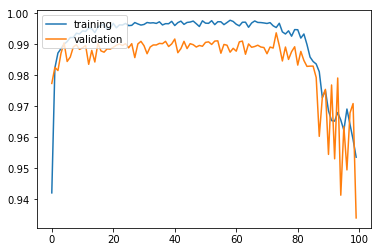

In [74]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training is rather unstable; accuracy falling down after around 80 epochs

In [75]:
results = model.evaluate(x_test, y_test)

 9664/10000 [===========================>..] - ETA: 0s

In [76]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9368


Cost function is an important part in convolution neural networks, which is used to measure the inconsistency between predicted value and actual label 
 It is a non-negative value, where the robustness of model increases along with the decrease of the value of loss function. Loss function is the hard core of empirical risk function as well as a significant component of structural risk function.
Mean Squared Error (MSE), or quadratic, loss function is widely used in linear regression as the performance measure, and the method of minimizing MSE is called Ordinary Least Squares (OSL), 
Hinge Loss, also known as max-margin objective, is a loss function used for training classifiers. The hinge loss is used for “maximum-margin” classification, most notably for support vector machines (SVMs).
Cross Entropy is commonly-used in binary classification (labels are assumed to take values 0 or 1) as a loss function (For multi-classification, use Multi-class Cross Entropy)
Network Plateau reaches its highest peak when cross entrophy is used as a cost function

##  Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [65]:
from tensorflow.python.keras.layers import BatchNormalization, Dropout

In [102]:

def deep_cnn_advanced():
    model = tf.keras.Sequential()
    
    #conv1 layer
    model.add(tf.keras.layers.Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('elu'))
    #conv2 layer
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    #conv3 layer
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('elu'))
    
    #conv4 layer
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    #conv5 layer
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('elu'))
    
    #conv6 layer 
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(tf.keras.layers.Flatten())
    # dense layer with 50 neurons
    model.add(tf.keras.layers.Dense(50, activation = 'elu', kernel_initializer='he_normal'))
    model.add(tf.keras.layers.Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    #adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSProp', metrics = ['accuracy'])
    
    return model

In [103]:
model = deep_cnn_advanced()

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_v1_48 (B (None, 28, 28, 50)        200       
_________________________________________________________________
activation_67 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_v1_49 (B (None, 28, 28, 50)        200       
_________________________________________________________________
activation_68 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 50)        0         
__________

In [84]:
%%time
history = model.fit(x_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)

Wall time: 38min 26s


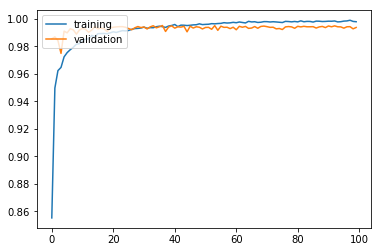

In [85]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Stable and comparable result is obtained

In [86]:
results = model.evaluate(x_test, y_test)

 9792/10000 [============================>.] - ETA: 0s

In [87]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9942


Epoch is one of the most important creiteria in a deep learning model 
If train long enough the model ,will have a very high train accuracy and the validation accuracy will decrease because your model won't be able to generalize well.
Although there is not a significant change in the accuracy , but still when the epoch is changed from 10 to 100 the accuracy increases exponentially
The network plateau hits the highest with epoch is run at 100 which gives much better accuracy for the trainig CNN model which increases by using the networ initializer

##  Deep CNN - 3
- Namely "Network In Network (NIN)" or "1 X 1 convolutions"
    - Method is simple - adding convolutional layers after other convolutional layers
    - Has the effect of reducing the dimensionality (depth) of image space, effectively reducing the number of parameters
   

In [41]:
xavier_init=tf.contrib.layers.xavier_initializer(
    uniform=True,
    seed=None,
    dtype=tf.dtypes.float32
)

In [89]:
def deep_cnn_advanced_nin():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('tanh'))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('tanh'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('tanh'))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('tanh'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('tanh'))
    
    model.add(tf.keras.layers.Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('tanh'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(tf.keras.layers.Flatten())
    # dense layer with 50 neurons
    model.add(tf.keras.layers.Dense(50, activation = 'tanh', kernel_initializer='xavier_init'))
    model.add(tf.keras.layers.Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(tf.keras.layers.Dense(10, activation = 'softmax', kernel_initializer='xavier_init'))
    
   # adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model 

Network Architecture
A fully connected network would take this image as an array by flattening it and considering pixel values as features to predict the number in image. Definitely it’s tough for the network to understand what’s happening underneath.
We need three basic components to define a basic convolutional network.

*The convolutional layer
In this layer, what happens is exactly what we saw in case 6 above. Suppose we have an image of size 6*6. We define a weight matrix which extracts certain features from the images
*The Pooling layer[optional]
Sometimes when the images are too large, we would need to reduce the number of trainable parameters. It is then desired to periodically introduce pooling layers between subsequent convolution layers. Pooling is done for the sole purpose of reducing the spatial size of the image. Pooling is done independently on each depth dimension, therefore the depth of the image remains unchanged. The most common form of pooling layer generally applied is the max pooling.
*The output layer
After multiple layers of convolution and padding, we would need the output in the form of a class. The convolution and pooling layers would only be able to extract features and reduce the number of parameters from the  original images. However, to generate the final output we need to apply a fully connected layer to generate an output equal to the number of classes we need. It becomes tough to reach that number with just the convolution layers. Convolution layers generate 3D activation maps while we just need the output as whether or not an image belongs to a particular class. The output layer has a loss function like categorical cross-entropy, to compute the error in prediction. Once the forward pass is complete the backpropagation begins to update the weight and biases for error and loss reduction.
The network plateau gets immensely afffected and tends to increase after increase in convolution layers also by increasing the size of the layer exonentially 



In [110]:
model = deep_cnn_advanced_nin()

In [111]:
model.summary()    # note that the number of parameters are greatly reduced

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_v1_60 (B (None, 28, 28, 50)        200       
_________________________________________________________________
activation_79 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 28, 28, 50)        22550     
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 28, 28, 25)        1275      
_________________________________________________________________
batch_normalization_v1_61 (B (None, 28, 28, 25)        100       
_________________________________________________________________
activation_80 (Activation)   (None, 28, 28, 25)        0         
__________

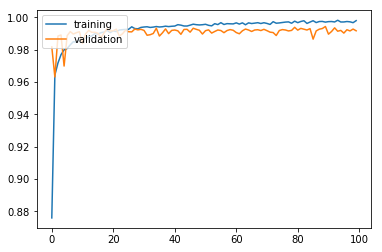

In [102]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Fairly stable result even with smaller number of parameters

In [103]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s     


In [104]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9914


Gradient estimators used in different models are adam,adadelta, RMSPROP
compute the optimisation direction by back-propagating the gradient with respect to the predicted pose on the model and update the network weights. We thoroughly evaluate the effectiveness of our loss function by comparing its performance with popular and most commonly used existing methods, on tasks such as image-based localisation and intensity-based 2D/3D registration. We also show that hyper-parameters, used in our loss function to weight the contribution between rotations and translations, can be intrinsically calculated from the dataset to achieve greater performance margins.
The networkk plateau that highly increases the accuracy of the model with other computing functions is Adam
Gradient descent is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks. At the same time, every state-of-the-art Deep Learning library contains implementations of various algorithms to optimize gradient descent
Adaptive Moment Estimation (Adam)is another method that computes adaptive learning rates for each parameter.
Performance of ADAM is much better than any other gradient estimator

# CITATION
* https://www.tensorflow.org/tutorials/keras/basic_classification                           --Introduction to Start
* https://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/                      --Tensorflow with keras
* https://www.tensorflow.org/api_docs/python/tf/keras/activations                           --Activation Function 
* https://www.tensorflow.org/api_docs/python/tf/keras/losses                                --Cost Function
* https://www.tensorflow.org/alpha/guide/keras/training_and_evaluation                      --Epochs
* https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients                     --Gradient Estimator
* https://www.tensorflow.org/api_docs/python/tf/keras/initializers/he_normal                --Network Initializer
* https://medium.com/tensorflow/training-and-serving-ml-models-with-tf-keras-fd975cc0fa27   --CNN Modelling

# LICENSE:

Copyright 2019 Spurthi Shetty

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.